In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

In [13]:
ebd_left_CINGULATE = pd.read_csv('/volatile/ad279118/2023_jlaval_STSbabies/contrastive/notebooks/antoine/MOStest/residualized_test/latent_IID_pre_residualized.csv', sep='\t')
#print(ebd_left_CINGULATE.head())
print(ebd_left_CINGULATE.shape)
ebd_left_CINGULATE.head()

(21045, 258)


,FID,IID,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
0,1913249,1000021,0.017629,1.079423,0.124071,0.633736,-0.924202,1.117974,1.536370,-0.561391,...,0.424007,2.295310,-0.046469,1.236047,0.579894,0.501846,1.291086,-0.866059,0.968373,-0.185558
1,2054263,1000458,0.340064,-0.940574,0.044680,0.559023,0.259933,0.484896,-1.528279,1.451338,...,0.423355,-0.387920,0.228884,0.045873,-1.232730,-0.643082,0.594044,-0.297454,-0.588795,-0.316306
2,2271224,1000575,0.408809,-0.089689,-0.579049,-0.617080,0.839332,-0.334768,-0.045515,-1.266269,...,-1.340623,0.215576,0.347013,0.343979,-1.386178,-0.747143,-1.202240,0.382147,-1.044877,0.354486
3,3340590,1000606,-0.112676,0.371406,-1.067555,0.739919,1.609388,-1.152458,3.522402,-0.635775,...,1.497239,-0.264741,-0.195382,1.029377,-2.223502,-0.284531,0.054817,1.226642,-0.618954,2.045381
4,3308682,1000963,-1.062096,-1.573062,0.505091,0.915293,-0.343094,1.306031,-1.225884,1.637412,...,0.401181,-0.627778,0.086700,0.254393,1.361992,-0.281927,1.313897,-1.390236,0.067228,-3.350111


In [14]:
covar_file = pd.read_csv('/volatile/ad279118/2023_jlaval_STSbabies/contrastive/notebooks/antoine/MOStest/residualized_test/random_cov.csv', sep='\t')
print(covar_file.head())
print(covar_file.shape)

       FID      IID   Age  Cheadle  Sex      PC01      PC02      PC03  \
0  1913249  1000021  73.0        1    1  2.358986  1.036363 -0.529826   
1  2054263  1000458  76.0        1    0 -0.854702  1.861525  1.352201   
2  2271224  1000575  61.0        0    1  2.181433 -0.001218 -2.657018   
3  3340590  1000606  57.0        1    1 -1.120571 -2.175875 -2.156875   
4  3308682  1000963  57.0        0    0 -1.882943 -0.625434  0.067552   

       PC04      PC05      PC06      PC07      PC08      PC09      PC10  \
0  0.646537 -2.274064 -2.664317  1.810421  1.181812  0.718989 -0.560832   
1 -2.895730  0.856897 -1.994685  2.132624  0.767380 -1.252746  2.485795   
2 -2.552692  1.835070  2.174258 -2.084020 -1.771860  0.699605 -1.636098   
3 -2.377272 -2.777382 -1.435042 -2.218442 -0.506159  1.089905 -0.009648   
4  1.607302  2.985516 -2.003701 -2.807870 -2.915292 -2.493398 -1.257889   

   BrainVolumeFreeSurfer_mm3  
0               1.044398e+06  
1               1.546603e+06  
2               1

In [15]:
merged_data = pd.merge(left=ebd_left_CINGULATE, right=covar_file, how='inner', on='IID')

print(merged_data.shape)
print()

merged_data.head()

(21045, 273)



,FID_x,IID,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,...,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,BrainVolumeFreeSurfer_mm3
0,1913249,1000021,0.017629,1.079423,0.124071,0.633736,-0.924202,1.117974,1.536370,-0.561391,...,1.036363,-0.529826,0.646537,-2.274064,-2.664317,1.810421,1.181812,0.718989,-0.560832,1.044398e+06
1,2054263,1000458,0.340064,-0.940574,0.044680,0.559023,0.259933,0.484896,-1.528279,1.451338,...,1.861525,1.352201,-2.895730,0.856897,-1.994685,2.132624,0.767380,-1.252746,2.485795,1.546603e+06
2,2271224,1000575,0.408809,-0.089689,-0.579049,-0.617080,0.839332,-0.334768,-0.045515,-1.266269,...,-0.001218,-2.657018,-2.552692,1.835070,2.174258,-2.084020,-1.771860,0.699605,-1.636098,1.336933e+06
3,3340590,1000606,-0.112676,0.371406,-1.067555,0.739919,1.609388,-1.152458,3.522402,-0.635775,...,-2.175875,-2.156875,-2.377272,-2.777382,-1.435042,-2.218442,-0.506159,1.089905,-0.009648,1.911444e+06
4,3308682,1000963,-1.062096,-1.573062,0.505091,0.915293,-0.343094,1.306031,-1.225884,1.637412,...,-0.625434,0.067552,1.607302,2.985516,-2.003701,-2.807870,-2.915292,-2.493398,-1.257889,1.246957e+06


<AxesSubplot:>

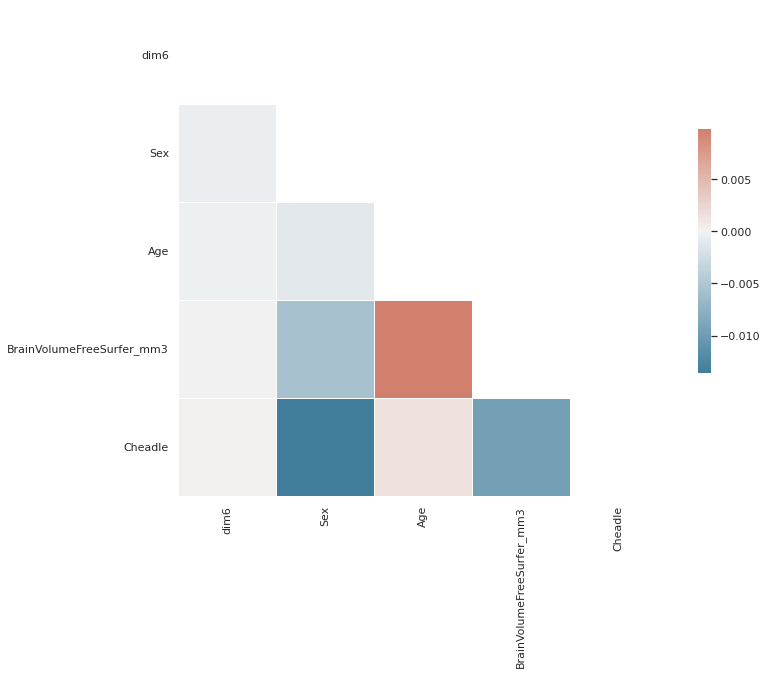

In [16]:
# Define the covariates
list_cov = ['Sex', 'Age', 'BrainVolumeFreeSurfer_mm3', 'Cheadle']#, 'isBigBrain', 'isOld']

sns.set_theme(style="white")

# Compute the correlation matrix
corr = merged_data[['dim6']+list_cov].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
            #vmin=-0.5, vmax=0.5, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
# Define the phenotype column
phenotype_col = [f'dim{i}' for i in range(1,257)]
corr = merged_data.corr()
abs(corr.loc[list_cov][phenotype_col]).max(axis=1)

Sex                          0.001927
Age                          0.002162
BrainVolumeFreeSurfer_mm3    0.002320
Cheadle                      0.002146
dtype: float64

In [24]:
for col in phenotype_col:
    # Fit the linear model
    X = merged_data[list_cov]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = merged_data[col]
    model = sm.OLS(y, X, missing='drop').fit()

    # Get the intercept and residuals
    #intercept = model.params.loc['const']
    residuals = model.resid

    # Update the phenotype column with the pre-residualized values
    # In fact, the intercept is not usefull because of the normalization which will follow
    merged_data[col] = residuals

<AxesSubplot:>

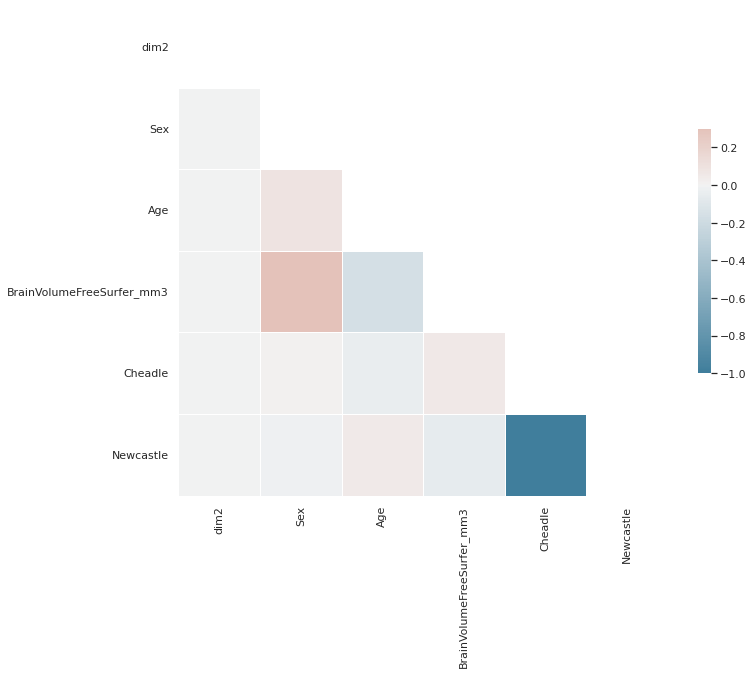

In [9]:
corr = merged_data[['dim2']+list_cov].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
corr = merged_data.corr()

In [11]:
abs(corr.loc[list_cov][phenotype_col]).max(axis=1)

Sex                          4.580384e-12
Age                          2.393808e-13
BrainVolumeFreeSurfer_mm3    3.485287e-12
Cheadle                      1.289133e-13
Newcastle                    1.288066e-13
dtype: float64

<AxesSubplot:>

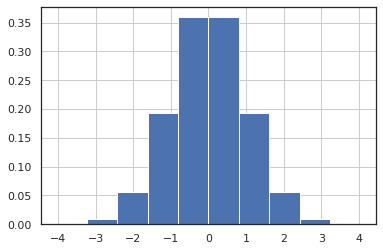

In [15]:
dim_example='dim7'
merged_data[dim_example].hist(density=True)

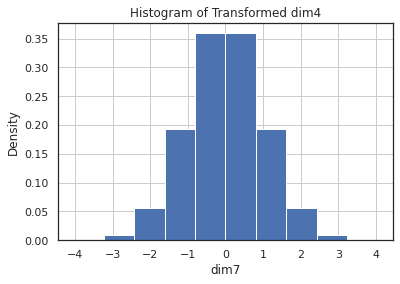

In [16]:
for dim_i in phenotype_col:
    # Calculate the ECDF values for 'dim_i'
    ecdf_values = merged_data[dim_i].rank(method='average') / len(merged_data[dim_i])

    # Apply the quantile function of the normal distribution
    qnorm_values = norm.ppf(ecdf_values - 0.5 / len(merged_data[dim_i]))

    # Assign the transformed values back to 'dim_i'
    merged_data[dim_i] = qnorm_values

# Plot the histogram of the transformed 'dim_i'
merged_data[dim_example].hist(density=True)
plt.xlabel(dim_example)
plt.ylabel('Density')
plt.title('Histogram of Transformed dim4')
plt.show()